In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.shape

(1025, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(302, 14)

## What is the average age of patients in the dataset?


In [16]:
df['age'].mean()

54.420529801324506

## What is the gender distribution of patients?


In [20]:
df['gender_clean']=df['sex'].map({1:'Male',0:'Female'})

In [22]:
df['sex'].value_counts(normalize=True)*100

sex
1    68.211921
0    31.788079
Name: proportion, dtype: float64

## What is the average resting blood pressure of patients?

In [23]:
df['trestbps'].mean()

131.60264900662253

## How does maximum heart rate vary with exercise-induced angina?


In [24]:
df.groupby('exang')['thalach'].mean() 

exang
0    155.596059
1    137.212121
Name: thalach, dtype: float64

## Is there a significant difference in resting blood pressure between male and female patients?

In [25]:
df.groupby('gender_clean')['trestbps'].mean()

gender_clean
Female    133.083333
Male      130.912621
Name: trestbps, dtype: float64

## What are the different types of chest pain recorded in the dataset?

In [27]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

# What percentage of patients experience exercise-induced angina?

In [28]:
df['exang'].mean() * 100

32.78145695364238

## How many patients have a resting electrocardiographic result of 2?

In [31]:
df['restecg'].value_counts()[2]

4

## What is the correlation between age and cholesterol levels?


In [32]:
df['age'].corr(df['chol'])

0.20721550565611757

## What is the distribution of chest pain types across different age groups?

<Axes: xlabel='age'>

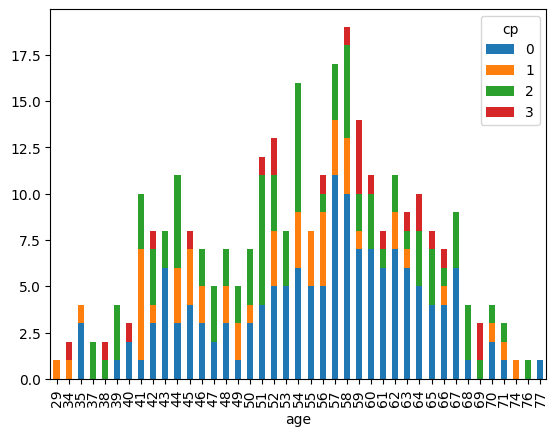

In [34]:
df.groupby('age')['cp'].value_counts().unstack().plot(kind='bar', stacked=True)

Observation:

Late 50's patients showing all kind of Chest pain variants.

## How does maximum heart rate vary with exercise-induced angina?

In [36]:
df.groupby('exang')['thalach'].mean()

exang
0    155.596059
1    137.212121
Name: thalach, dtype: float64

Observation:

Max heart rate achieved for exercise induced angina (0 = no). 

## Is there a significant difference in resting blood pressure between male and female patients?

In [37]:
df.groupby('sex')['trestbps'].mean()

sex
0    133.083333
1    130.912621
Name: trestbps, dtype: float64

Observation:

Female have more resting bp than men

## What is the average oldpeak value for patients with different types of chest pain?

In [38]:
df.groupby('cp')['oldpeak'].mean()

cp
0    1.383217
1    0.316000
2    0.806977
3    1.391304
Name: oldpeak, dtype: float64

## Perform a pairwise comparison of clinical measurements for patients with and without heart disease.

In [39]:
df[df['target'] == 1].describe() and df[df['target'] == 0].describe()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 200x200 with 0 Axes>

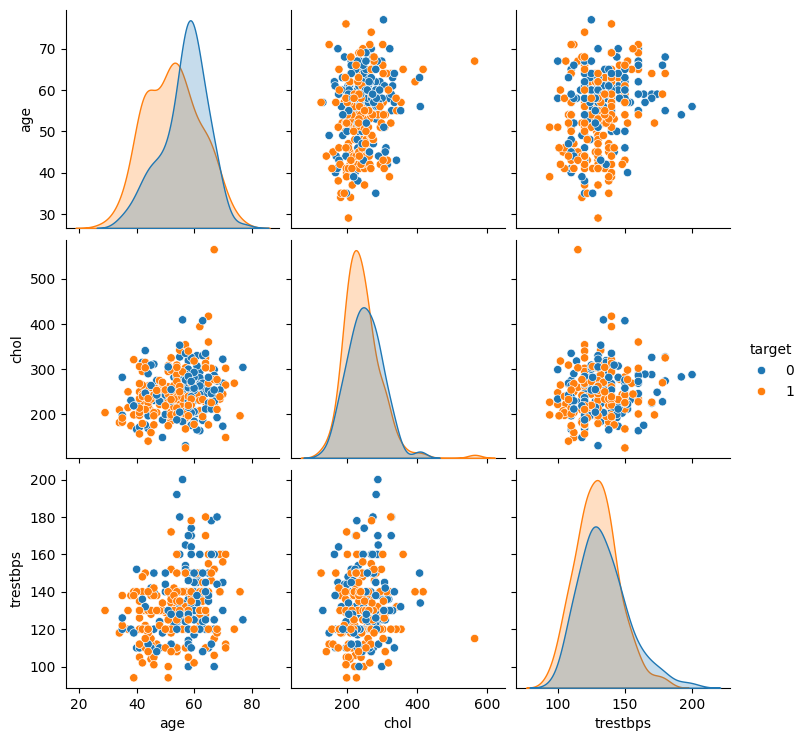

In [45]:
plt.figure(figsize=(2,2))
sns.pairplot(df, hue='target', vars=['age', 'chol', 'trestbps'])

Observation:

Heart disease cases are more concentrated in middle-aged individuals (50–60), suggesting risk rises significantly after 45.
Cholesterol alone does not clearly separate heart disease vs non-disease groups — indicating weak standalone predictive power.
Cholesterol does not systematically increase with age in this dataset.
No single feature (age, cholesterol, BP) clearly separates the classes. A multivariate ML model is required.